# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer than the northern hemisphere. This may be due to the tilt of the earth. 
* There is no strong correlation between humidity nor cloudiness to latitude. However,the northern sphere is a little more humid than the southern sphere at the time of analysis in March. At certain lattitude, the level of cloudiness are pretty spread similarly.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there are a few more cities with higher wind speed compared to southern hemisphere.

---


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
from confg import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url for openweathermap.org for the API call
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# create empty list to hold city information
city_data = []

# starting
print("Beginning Data Retrieval")
print("------------------------")


city_count = 1


# Loop through all cities

for city in cities:   
    
     city_url = url + "&q="+city
    
  
    # Run an API request for each of the cities and check for missing data
     try:
       
        # Parsing with json to retrieve data
        city_weather = requests.get(city_url).json()

       
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append to city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #print (city_count, city)
        print(f"Processing Record {city_count}|{city}")
        print(city_url)

        # Adding to  count
        city_count += 1
    # If error, skip to next city
     except:
        print("City not found. Skipping... ")
        continue
              
print("--------------------")
print("Data Ended")



Beginning Data Retrieval
------------------------
Processing Record 1|yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=yellowknife
City not found. Skipping... 
Processing Record 2|portobelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=portobelo
Processing Record 3|miles city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=miles city
Processing Record 4|rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=rikitea
Processing Record 5|saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=saint-pierre
Processing Record 6|fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=fortuna
Processing Record 7|ponta delgada
http://api.openweathermap

Processing Record 57|barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=barrow
Processing Record 58|kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=kodiak
Processing Record 59|iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=iqaluit
Processing Record 60|souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=souillac
Processing Record 61|lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=lebu
Processing Record 62|kushiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=kushiro
Processing Record 63|najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=najran
Processing Record 64|atambua
h

Processing Record 113|doka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=doka
Processing Record 114|kudat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=kudat
Processing Record 115|dryden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=dryden
Processing Record 116|skagen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=skagen
Processing Record 117|mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=mnogovershinnyy
Processing Record 118|pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=pangnirtung
Processing Record 119|ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=ugoofaaru

Processing Record 169|plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=plettenberg bay
Processing Record 170|sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=sinnamary
Processing Record 171|jucurutu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=jucurutu
Processing Record 172|puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=puerto ayora
Processing Record 173|provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=provideniya
Processing Record 174|ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=ahipara
Processing Record 175|cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa82

Processing Record 224|nova olimpia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=nova olimpia
Processing Record 225|zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=zhangye
Processing Record 226|luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=luanda
Processing Record 227|naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=naze
Processing Record 228|carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=carnarvon
City not found. Skipping... 
Processing Record 229|tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=tromso
Processing Record 230|korem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1d

Processing Record 281|tieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=tieli
Processing Record 282|mier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=mier
Processing Record 283|noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=noumea
Processing Record 284|puerto colombia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=puerto colombia
Processing Record 285|mpika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=mpika
Processing Record 286|innisfail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=innisfail
Processing Record 287|cherdyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=cherdyn
Processin

Processing Record 338|west wendover
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=west wendover
Processing Record 339|opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=opuwo
Processing Record 340|qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=qaqortoq
Processing Record 341|strehaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=strehaia
Processing Record 342|ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=ribeira grande
Processing Record 343|erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=erenhot
Processing Record 344|chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4

Processing Record 394|mayna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=mayna
Processing Record 395|natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=natal
Processing Record 396|wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=wanning
Processing Record 397|mompos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=mompos
Processing Record 398|hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=hofn
Processing Record 399|cassia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=cassia
Processing Record 400|shaping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=shaping
Processing Record 401|fort nels

Processing Record 450|gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=gamba
Processing Record 451|bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=bandarbeyla
Processing Record 452|thanh hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=thanh hoa
Processing Record 453|moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=moose factory
Processing Record 454|rio claro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=rio claro
City not found. Skipping... 
Processing Record 455|shitanjing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=shitanjing
Processing Record 456|jacareacanga
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 506|hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=hualmay
Processing Record 507|umm lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=umm lajj
City not found. Skipping... 
Processing Record 508|baturaja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=baturaja
Processing Record 509|matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=matagami
Processing Record 510|dawei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=dawei
Processing Record 511|vitim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d99b4f7d78aa8264d33421d1dc06f4c1&q=vitim
City not found. Skipping... 
Processing Record 512|batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)


lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export City_Data into a csv file
city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_data_pd.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [6]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yellowknife,90,CA,1553666169,79,62.45,-114.38,23.00,13.87
1,portobelo,20,PA,1553666098,74,9.55,-79.65,78.80,6.93
2,miles city,1,US,1553666228,61,46.41,-105.84,48.20,4.70
3,rikitea,88,PF,1553666157,96,-23.12,-134.97,80.18,14.38
4,saint-pierre,0,FR,1553665924,86,48.95,4.24,39.20,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

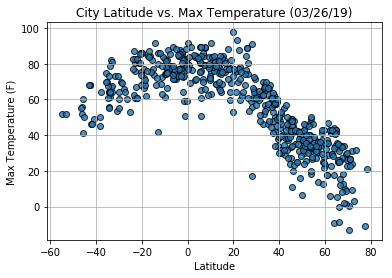

In [7]:
# Scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (03/26/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/plot1.png")

plt.show()

#### Latitude vs. Humidity Plot

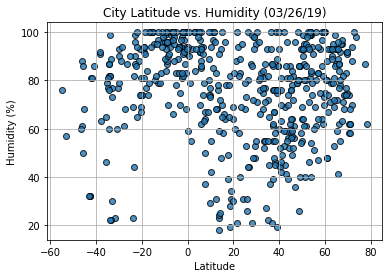

In [8]:
# Scatter plot for latitude vs Humidity

plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity (03/26/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/plot2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

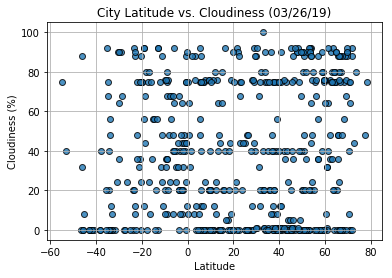

In [9]:
# Scatter plots for Latitude vs Cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (03/26/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("output_data/plot3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

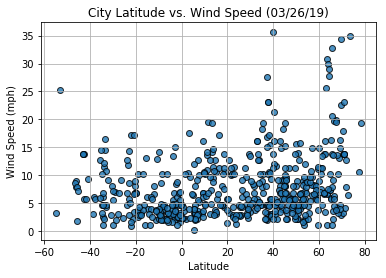

In [10]:
# Scatter plots for Latitude vs Windspeed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (03/26/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/plot4.png")

plt.show()